[View in Colaboratory](https://colab.research.google.com/github/findingfoot/ML_practice-codes/blob/master/IRIS_Setosa.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [0]:
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])

iris_2d = np.array([[x[2], x[3]] for x in iris.data])

In [62]:
print(binary_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [0]:
batch_size = 20

sess= tf.Session()

In [0]:
#Placeholder

x1_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
x2_data = tf.placeholder(shape = [None,1], dtype = tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype= tf.float32)

In [0]:
#Model variables linear regression

A = tf.Variable(tf.random_normal(shape = [1,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))

In [0]:
# Add model to graph:
# x1 - A*x2 + b

my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

In [0]:
#loss

cross_entropy_loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_output, labels = y_target)

In [0]:
#optimizer

my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(cross_entropy_loss)

init = tf.global_variables_initializer()
sess.run(init)

In [0]:
for i in range(1000):
  rand_index = np.random.choice(len(iris_2d), size=batch_size)
  rand_x = iris_2d[rand_index]
  rand_x1 = np.array([[x[0]] for x in rand_x])
  rand_x2 = np.array([[x[1]] for x in rand_x])
  rand_y = np.array([[y] for y in binary_target[rand_index]])
  sess.run(train_step, feed_dict = {x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
  
    

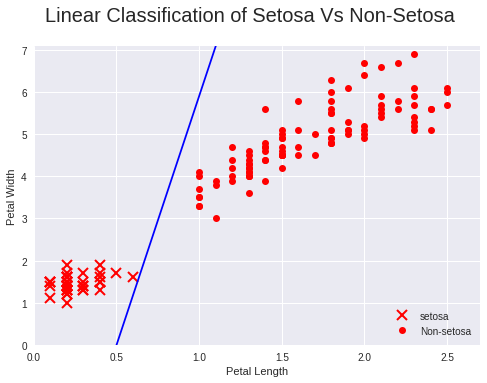

In [82]:
[[slope]] = sess.run(A)

[[intercept]] = sess.run(b)

x = np.linspace(0, 7, num=50)
ablineValues = []
for i in x:
  ablineValues.append(slope*i+intercept)
  
  
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]

plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Classification of Setosa Vs Non-Setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()